# 1. Geometric Distortion Model

Available distortion models include Standard Radial Distortion Model(SRDM), Division-mode Radial Distortion Model(DRDM), Tangential Distortion Model(also known as the de-centering distortion), and Brown-Conrady Distortion Model(BCDM).

Considering that the distortion model involves the power of the distance from the distortion center to pixels, the length scale is introduced here. Associaated with the length scale, the normalized model coefficients is also necessary.

## Example: Standard Radial Distortion Model(SRDM)

The Standard Radial Distortion Model(SRDM) is defined by the distortion center and the distortion coefficients.
- The 3rd order polynomial in standard form: $r_u = r_d + k_1 * r_d^3$
- The 5th order polynomial in standard form: $r_u = r_d + k_1 * r_d^3 + k_2 * r_d^5$
- The 5th order polynomial in all form: $r_u = r_d + k_1 * r_d^2 + k_2 * r_d^3 + k_3 * r_d^4 + k_4 * r_d^5$,
where $r_d$ is the distance between the distorted pixel coordinates and the distortion center, $r_u$ is the distance between the distortion-corrected pixel coordinates and the distortion center.

1. The 3rd order polynomial in standard form only works well for small amounts of distortion.
2. The 5th order polynomial produce more accurate results, especially for “wave” or “mustache” distortion, which might resemble barrel near the center of the image and pincushion near the corners (or vice-versa).
3. The 5th order all form use all coefficients up to the maximum instead of alternate coefficients (odd or even-only). We have not observed much advantage to these settings.
4. Higher order polynomials (7th order or higher) should be used with great care because results can become unstable, especially at the outer parts of the image. The image used to calculate the coefficients should have valid corner points near the edge of the image and there should be sufficient rows or columns. 

Basic formulas are as follows:

$x_u - x_c = r_u * \cos(\theta) = r_u * (x_d - x_c)/r_d = ... $

$y_u - y_c = r_u * \sin(\theta) = r_u * (y_d - y_c)/r_d = ... $

where $(x_c,y_c)$ is the pixel coordinates of the distortion center.

For more details, please refer to 
1. https://en.wikipedia.org/wiki/Distortion_(optics)
2. https://www.imatest.com/docs/distortion-methods-and-modules/
3. https://www.imatest.com/support/docs/pre-5-2/geometric-calibration-deprecated/distortion-models/ 

### Construct a Standard Radial Distortion Model

In [1]:
from starmatch.classes import Distortion
model = 'RadialStandard' # Type of distortion model
coeffs = [-1e-4,1e-4] # Coefficients of 5th order SRDM in form of [k1,k2]
dc = [0.1,0.1] # Pixel coordinates of the distortion center
distortion_scale = 128 # The length scale of the distortion model, that is, the number of pixels per unit length
distortion = Distortion(model,coeffs,dc,distortion_scale) # Establish a distortion model

### Compute the distortion-corrected pixel coordinates

In [2]:
pixels_xy = [367,125]
pixels_XY = distortion.apply(pixels_xy)
print(pixels_XY)
#Calculate the distortion-corrected pixel coordinates at normalized scale
#pixels_xy = [[2.8671875, 0.9765625], [1.109375, -0.875]]
#pixel_scale = 128
#pixels_XY  = distortion.apply(pixels_xy,pixel_scale)
#print(pixels_XY)

[[369.21610677 125.70199655]]


### Sketch the vector plot of distortion

<Figure size 432x288 with 0 Axes>

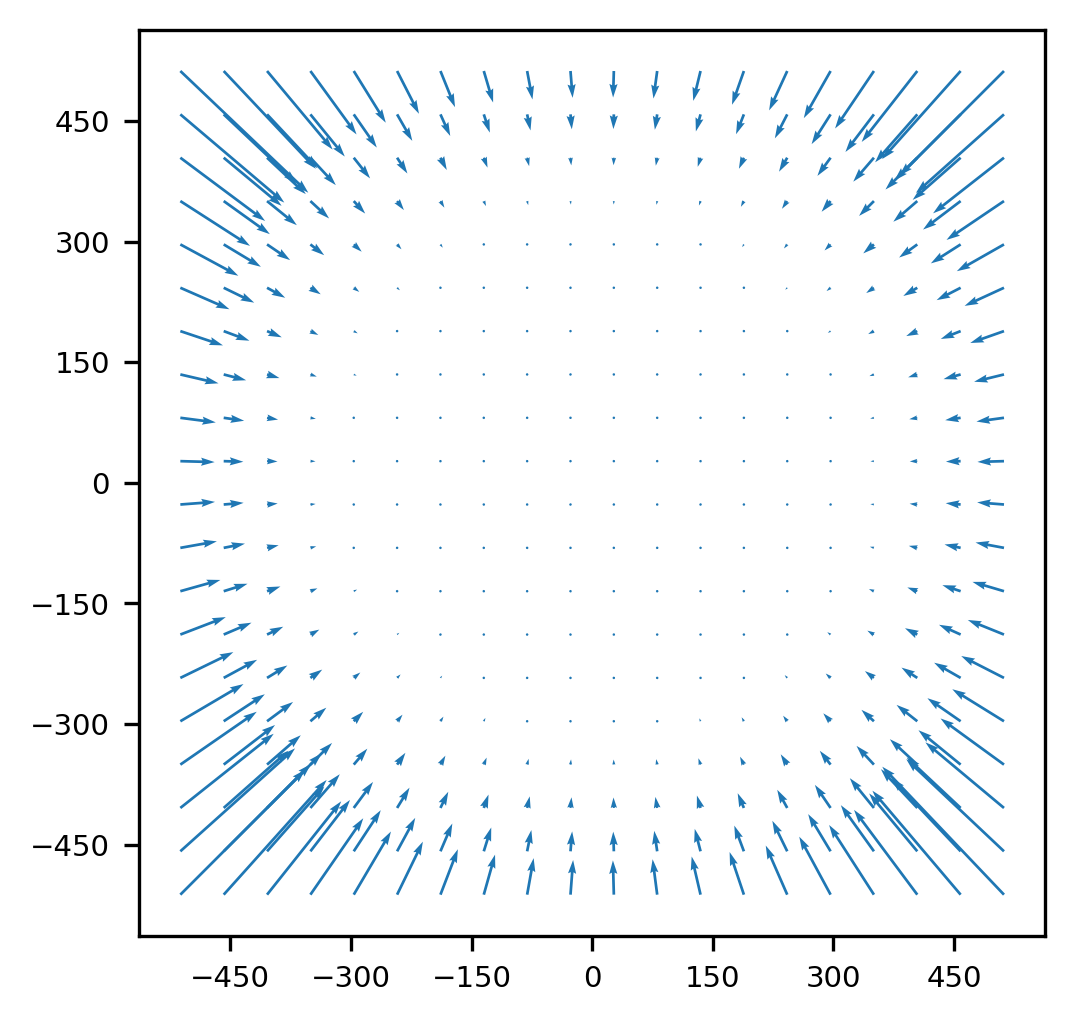

In [3]:
xlim,ylim = 512,512
distortion.sketchmap(xlim,ylim)
#For normalized pixel coordinates
#xlim,ylim = 4,4
#pixel_scale = 128
#distortion.sketchmap(xlim,ylim,pixel_scale)

## Example: Division-mode Radial Distortion Model(DRDM)

The Division-mode Radial Distortion Model defined by the distortion center and the distortion coefficients.
- The 2nd order polynomial in division form: $r_u = r_d /(1+ k_1 * r_d^2)$
- The 4th order polynomial in division form: $r_u = r_d /(1+ k_1 * r_d^2 + k_2 * r_d^4)$

Basic formulas for DRDM are same as that for SRDM.

### Construct a Division-mode Radial Distortion Model

In [4]:
from starmatch.classes import Distortion
model = 'RadialDivision' # Type of distortion model
coeffs = [-1e-4,1e-4] # Coefficients of 4th order DRDM in form of [k1,k2]
dc = [0.1,0.1] # Pixel coordinates of the distortion center
distortion_scale = 128 # The length scale of the distortion model, that is, the number of pixels per unit length
distortion = Distortion(model,coeffs,dc,distortion_scale) # Establish a distortion model

### Compute the distortion-corrected pixel coordinates

In [5]:
pixels_xy = [367,125]
pixels_XY = distortion.apply(pixels_xy)
print(pixels_XY)
#Calculate the distortion-corrected pixel coordinates at normalized scale
#pixels_xy = [[2.8671875, 0.9765625], [1.109375, -0.875]]
#pixel_scale = 128
#pixels_XY  = distortion.apply(pixels_xy,pixel_scale)
#print(pixels_XY)

[[364.79767243 124.30236829]]


### Sketch the vector plot of distortion

<Figure size 432x288 with 0 Axes>

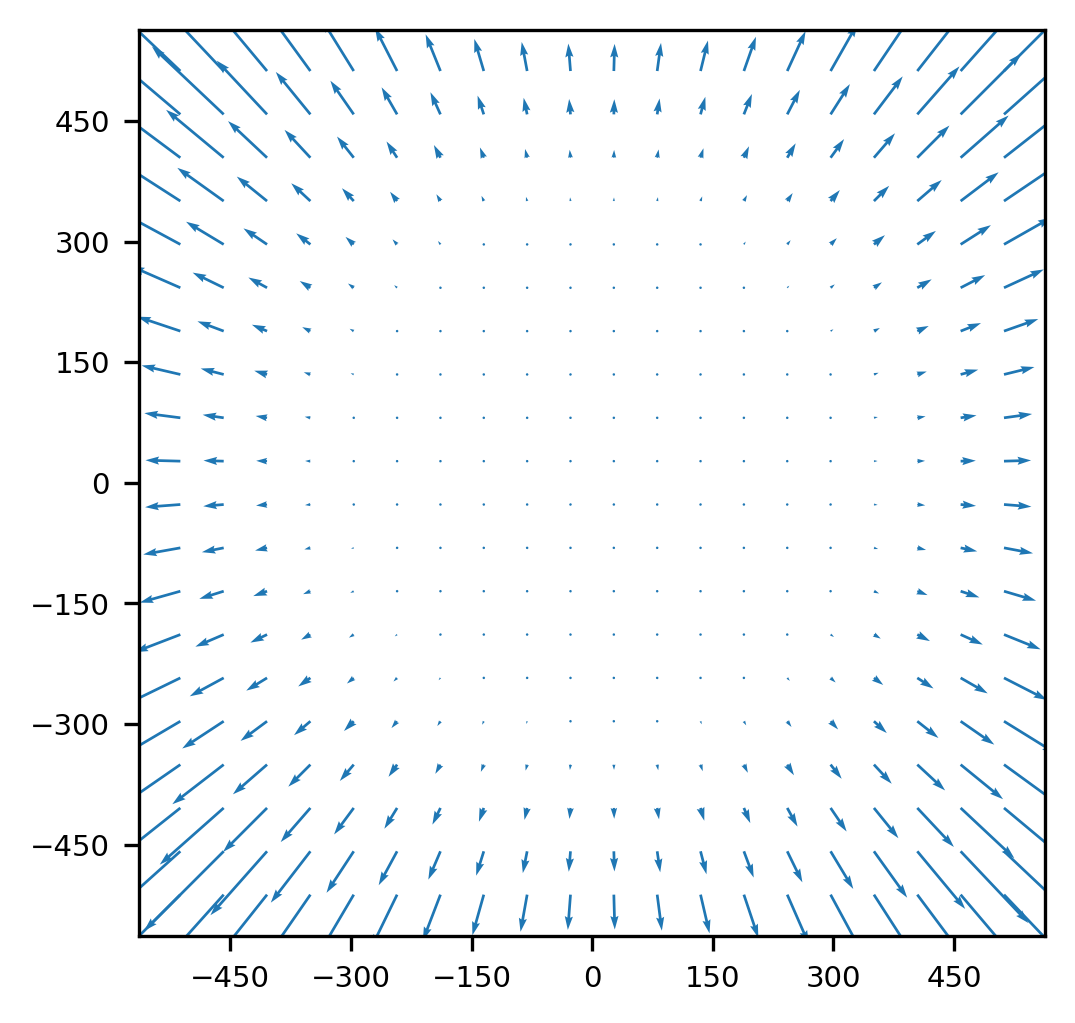

In [6]:
xlim,ylim = 512,512
distortion.sketchmap(xlim,ylim)
#For normalized pixel coordinates
#xlim,ylim = 4,4
#pixel_scale = 128
#distortion.sketchmap(xlim,ylim,pixel_scale)

## Example: Tangential Distortion Model

The Tangential Distortion Model(also known as the de-centering distortion) is defined by the distortion center and the distortion coefficients.

Basic formulas are as follows:

$x_u = x_d + (P_1 * (r_d^2 + 2*(x_d-x_c)^2) + 2*P_2 * (x_d-x_c)*(y_d-y_c))*(1 + P_3*r_d^2 + P_4*r_d^4 + ...)$

$y_u = y_d + (P_2 * (r_d^2 + 2*(y_d-y_c)^2) + 2*P_1 * (x_d-x_c)*(y_d-y_c))*(1 + P_3*r_d^2 + P_4*r_d^4 + ...)$

### Construct a Tangential Distortion Model

In [7]:
from starmatch.classes import Distortion
model = 'Tangential' # Type of distortion model
coeffs = [-1e-4,1e-4] # Coefficients of 2nd order SRDM in form of [P1,P2]
dc = [0.1,0.1] # Pixel coordinates of the distortion center
distortion_scale = 128 # The length scale of the distortion model, that is, the number of pixels per unit length
distortion = Distortion(model,coeffs,dc,distortion_scale) # Establish a distortion model

### Compute the distortion-corrected pixel coordinates

In [8]:
pixels_xy = [367,125]
pixels_XY = distortion.apply(pixels_xy)
print(pixels_XY)
#Calculate the distortion-corrected pixel coordinates at normalized scale
#pixels_xy = [[2.8671875, 0.9765625], [1.109375, -0.875]]
#pixel_scale = 128
#pixels_XY  = distortion.apply(pixels_xy,pixel_scale)
#print(pixels_XY)

[[366.75821931 125.06542319]]


### Sketch the vector plot of distortion

<Figure size 432x288 with 0 Axes>

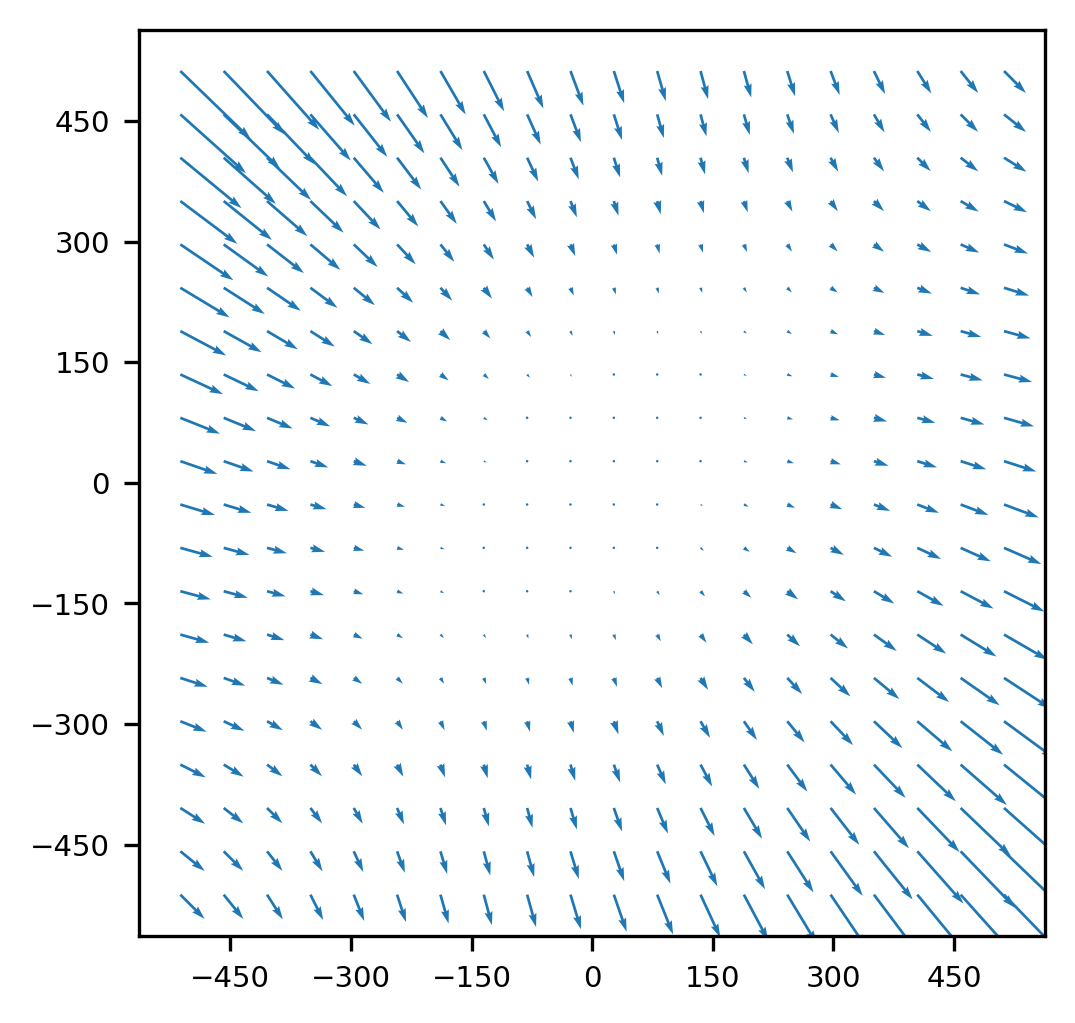

In [9]:
xlim,ylim = 512,512
distortion.sketchmap(xlim,ylim)
#For normalized pixel coordinates
#xlim,ylim = 4,4
#pixel_scale = 128
#distortion.sketchmap(xlim,ylim,pixel_scale)

## Example: Brown–Conrady distortion model

The Brown–Conrady model corrects both the radial distortion and the tangential distortion caused by physical elements in a lens not being perfectly aligned.

Basic formulas are as follows:

$x_u = x_d + (x_d - x_c) * (K_1*r_d^2 + K_2*r_d^4 + ...) + (P_1 * (r_d^2 + 2*(x_d-x_c)^2) + 2*P_2 * (x_d-x_c)*(y_d-y_c))*(1 + P_3*r_d^2 + P_4*r_d^4 + ...)$
    
$y_u = y_d + (y_d - x_c) * (K_1*r_d^2 + K_2*r_d^4 + ...) + (P_2 * (r_d^2 + 2*(y_d-y_c)^2) + 2*P_1 * (x_d-x_c)*(y_d-y_c))*(1 + P_3*r_d^2 + P_4*r+d^4 + ...)$

### Construct a Brown–Conrady distortion model

In [10]:
from starmatch.classes import Distortion
model = 'Brown–Conrady' # Type of distortion model
coeffs = [[-1e-4,1e-4],[1e-3,1e-3,1e-4,1e-5]] # Coefficients of Brown–Conrady distortion model in form of [[coeffs_radial],[coeffs_tangential]]
dc = [0.1,0.1] # Pixel coordinates of the distortion center
distortion_scale = 128 # The length scale of the distortion model, that is, the number of pixels per unit length
distortion = Distortion(model,coeffs,dc,distortion_scale) # Establish a distortion model

### Compute the distortion-corrected pixel coordinates

In [11]:
pixels_xy = [367,125]
pixels_XY = distortion.apply(pixels_xy)
print(pixels_XY)
#Calculate the distortion-corrected pixel coordinates at normalized scale
#pixels_xy = [[2.8671875, 0.9765625], [1.109375, -0.875]]
#pixel_scale = 128
#pixels_XY  = distortion.apply(pixels_xy,pixel_scale)
#print(pixels_XY)

[[372.88150908 127.60108593]]


### Sketch the vector plot of distortion

<Figure size 432x288 with 0 Axes>

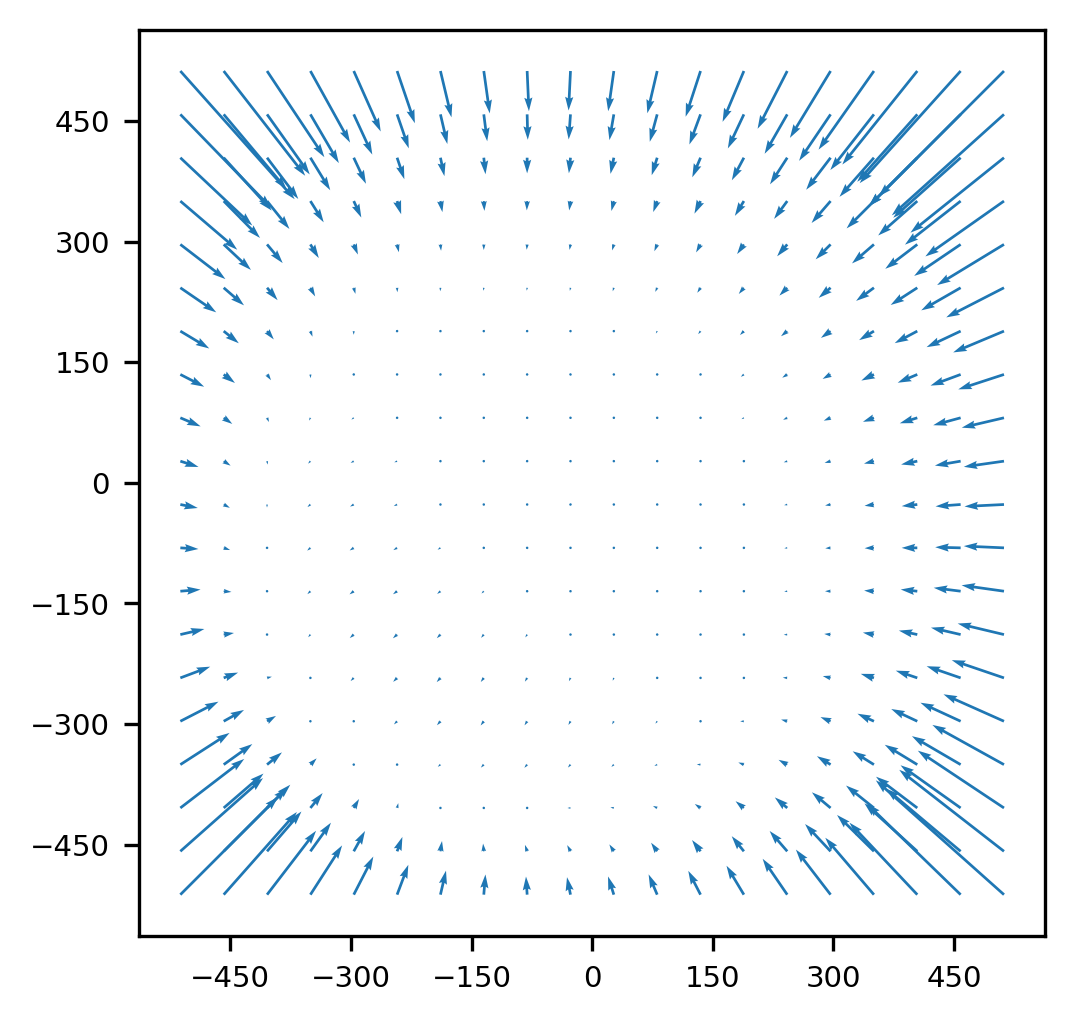

In [12]:
xlim,ylim = 512,512
distortion.sketchmap(xlim,ylim)
#For normalized pixel coordinates
#xlim,ylim = 4,4
#pixel_scale = 128
#distortion.sketchmap(xlim,ylim,pixel_scale)

# 2. Prelude to star map matching

Ahead of star map matching, a set of star catalog index files should be genarated using the python package starcatalogquery, which can be installed by `pip install starcatalogquery`. For more details, please refer to https://github.com/lcx366/STARQUERY.

## Extract sources from images

We use the python package `starextractor` to complete the source extraction, which can be installed by `pip install starextractor`. For more details, please refer to https://github.com/lcx366/STAREXTRACTOR.

In [13]:
from starextractor import AstroImage
imagefile = 'obs/fits/img_00000.fits' #imagefile = 'obs/bmp/img_00000.bmp'
image = AstroImage.read_image(imagefile)
sources = image.find_source(fwhm=14,mask=False)
xy,flux = sources.xy,sources.brightness

Generate an object of `Sources` using pixel coordinates and flux(grayscale value) of sources, as is the entrance to star map matching and astronomical calibration.

## Load the sources to StarMatch

In [14]:
from starmatch import StarMatch
# set the FOV[deg], pixel width[deg], resolution of the camera
camera_params = {'fov':10,'pixel_width':0.01,'res':(1024,1024)}
# We use the first 20 points to compute the triangle invariants involved in affine transformation. 
# Usually these points are those sources that are brightest.
sources1 = StarMatch.from_sources(xy,flux,camera_params,20) # No distortion corrected 

We get an object `sources1`  with
```
Attributes:
    - xy_raw -> Pixel coordinates of sources
    - flux_raw -> Flux(Grayscale value) of sources
    - xy -> Pixel coordinates of sources truncated by max_control_points
    - flux -> Flux(Grayscale value) of sources truncated by max_control_points
    - invariants -> Array of (L2/L1,L1/L0), where L2 >= L1 >= L0 are the three sides of the triangle composed of sources.
    - asterisms -> Array of the indices of sources that correspond to invariant triangles.
    - kdtree -> 2d-tree of triangel invariants for quick nearest-neighbor lookup
    - max_control_points -> Maximum number of sources used to execute the star map matching
    - _fov -> Field of View of camera in [deg]
    - _pixel_width -> Pixel width of camera in [deg]
    - _res -> Resolution of camera
```    

## Estimate the center pointing of the camera

We use the HYG v3.0 star catalog(Thanks to [David Nash](https://www.astronexus.com/hyg)) to genarate the h5-format index file according to the camera parameters(field of view, detected magnitude, observation time) with the python package starcatalogquery, which can be installed by `pip install starcatalogquery`. The h5-format index file records the center pointing of each sky area, the pixel coordinates, the triangle invariants and the asterism indices of the stars.

### Blind matching over star maps

In [15]:
catalogfile_h5 = 'starcatalogs/indices/hygv3/fov10_mag9.0_mcp20_2022.0.h5'
fp_radec = sources1.center_pointing(catalogfile_h5)
print(fp_radec)

(204.01793337608683, 36.24740259697955)m of 192


### Blind matching over star maps with the multi-core parallel computing

In [16]:
catalogfile_h5 = 'starcatalogs/indices/hygv3/fov10_mag9.0_mcp20_2022.0.h5'
fp_radec = sources1.center_pointing_mp(catalogfile_h5)
print(fp_radec) # (Ra,Dec) in [deg]

(204.01793337608683, 36.24740259697955)


# 3. Star Map Matching

Load the simplified HYG v3.0 star catalog.

In [17]:
from starcatalogquery import StarCatalog
# The following starcatalog path stores the tile files with size of 5 deg, stars magnitude less than 9.0, and proper motion correction to epoch of 2022.0.
dir_from_simplified = 'starcatalogs/simplified/hygv3/res5/mag9.0/epoch2022.0/'
hygv3_simplified = StarCatalog.load(dir_from_simplified)

The actual center pointing of the camera is (204.01706216087143, 36.25274704575726), in order to test the tolerance ability of star map matching, we set the pointing point to [200,30]. 

Note: in process of star map matching, we set **L**(default=32) as the normalized length scale, namely, number of pixels in a unit length. It controls the tolerance of the 3D-Tree composed of (x,y,mag) of sources from camera and stars from catalog. For example, if the tolerance is set to 0.2(default), it means the difference within 0.2*32=6.4 for pixel coordinates and 0.2 for magnitude is regarded as the correct matching.
Another use of L is associated with the GPR(Gaussian Process Regression)-based distortion correction bellow. Experience has shown that normalizing the pixel coordinates by L is beneficial to the operation of GPR.

In [18]:
fp_radec = [201,31]
sources1.align(fp_radec,hygv3_simplified,L=32)

Instance of class Sources

We get object `sources1` updated with new attributes added:
```
- _wcs -> WCS transformation, which defines the projection relationship between pixel coordinates and celestial coordinates
- fp_radec_affine -> Center pointing for affine transformations
- affine_matrix -> Affine matrix in form of [[λcosα,λsinα,λtx],[−λsinα,λcosα,λty],[0,0,1]] 
- _affine_translation -> Affine translation in form of [tx,ty]
- _affine_rotation -> Rotation angle of affine transformations α in [rad]
- _affine_scale -> Scale coefficient of affine transformations λ
- _L -> The normalized length scale 
- affine_results -> Instance of class Constructor, whose attributes include 
    xy -> Affined pixel coordinates of affine-matched sources
    xy_res -> Residuals of xy
    xy_rms -> RMS of xy
    mag_res -> Residuals of magnitudes for affine-matched sources
    mag_rms -> RMS of magnitudes for affine-matched sources
    C -> Magtitudes Constant for affine-matched sources
    C_sigma -> Uncertainty of magtitudes Constant
    catalog_df -> Pandas dataframe of matched stars for affine-matched sources
    _description -> results description
    pixels_camera_match -> Pixel coordinates of affine-matched sources
    radec_res -> Residuals of celestial coordinates for affine-matched sources
    radec_rms -> RMS of celestial coordinates for affine-matched sources
- match_results -> Instance of class Constructor, whose attributes include 
    xy ->  Affined pixel coordinates of 3D-Tree-matched sources
    xy_res -> Residuals of xy
    xy_rms -> RMS of xy
    mag_res -> Residuals of magnitudes for 3D-Tree-matched sources
    mag_rms -> RMS of magnitudes for 3D-Tree-matched sources
    C -> Magtitudes Constant for 3D-Tree-matched sources
    C_sigma -> Uncertainty of magtitudes Constant
    catalog_df -> Pandas dataframe of matched stars for 3D-Tree-matched sources
    _description -> results description
    pixels_camera_match -> Pixel coordinates of 3D-Tree-matched sources
    radec_res -> Residuals of celestial coordinates for 3D-Tree-matched sources
    radec_rms -> RMS of celestial coordinates for 3D-Tree-matched sources
```

where the `affine_results` refers to the statistic information of the affine-matched sources, and `match_results` refers to the statistic information of 3D-Tree-matched sources. The column names of catalog_df are as follows:
 - 'ra': Ra of stars in star catalog
 - 'dec', Dec of stars in star catalog
 - 'mag', Magnitudes in star catalog
 - 'pixelx', x of stars in star catalog
 - 'pixely', y of stars in star catalog
 - 'dx', x of stars - x of sources affined
 - 'dy', y of stars - y of sources affined
 - 'dmag', mag of stars - mag of sources affined
 - 'x_camera', x of sources
 - 'y_camera', y of sources


### Show the matching stars on map

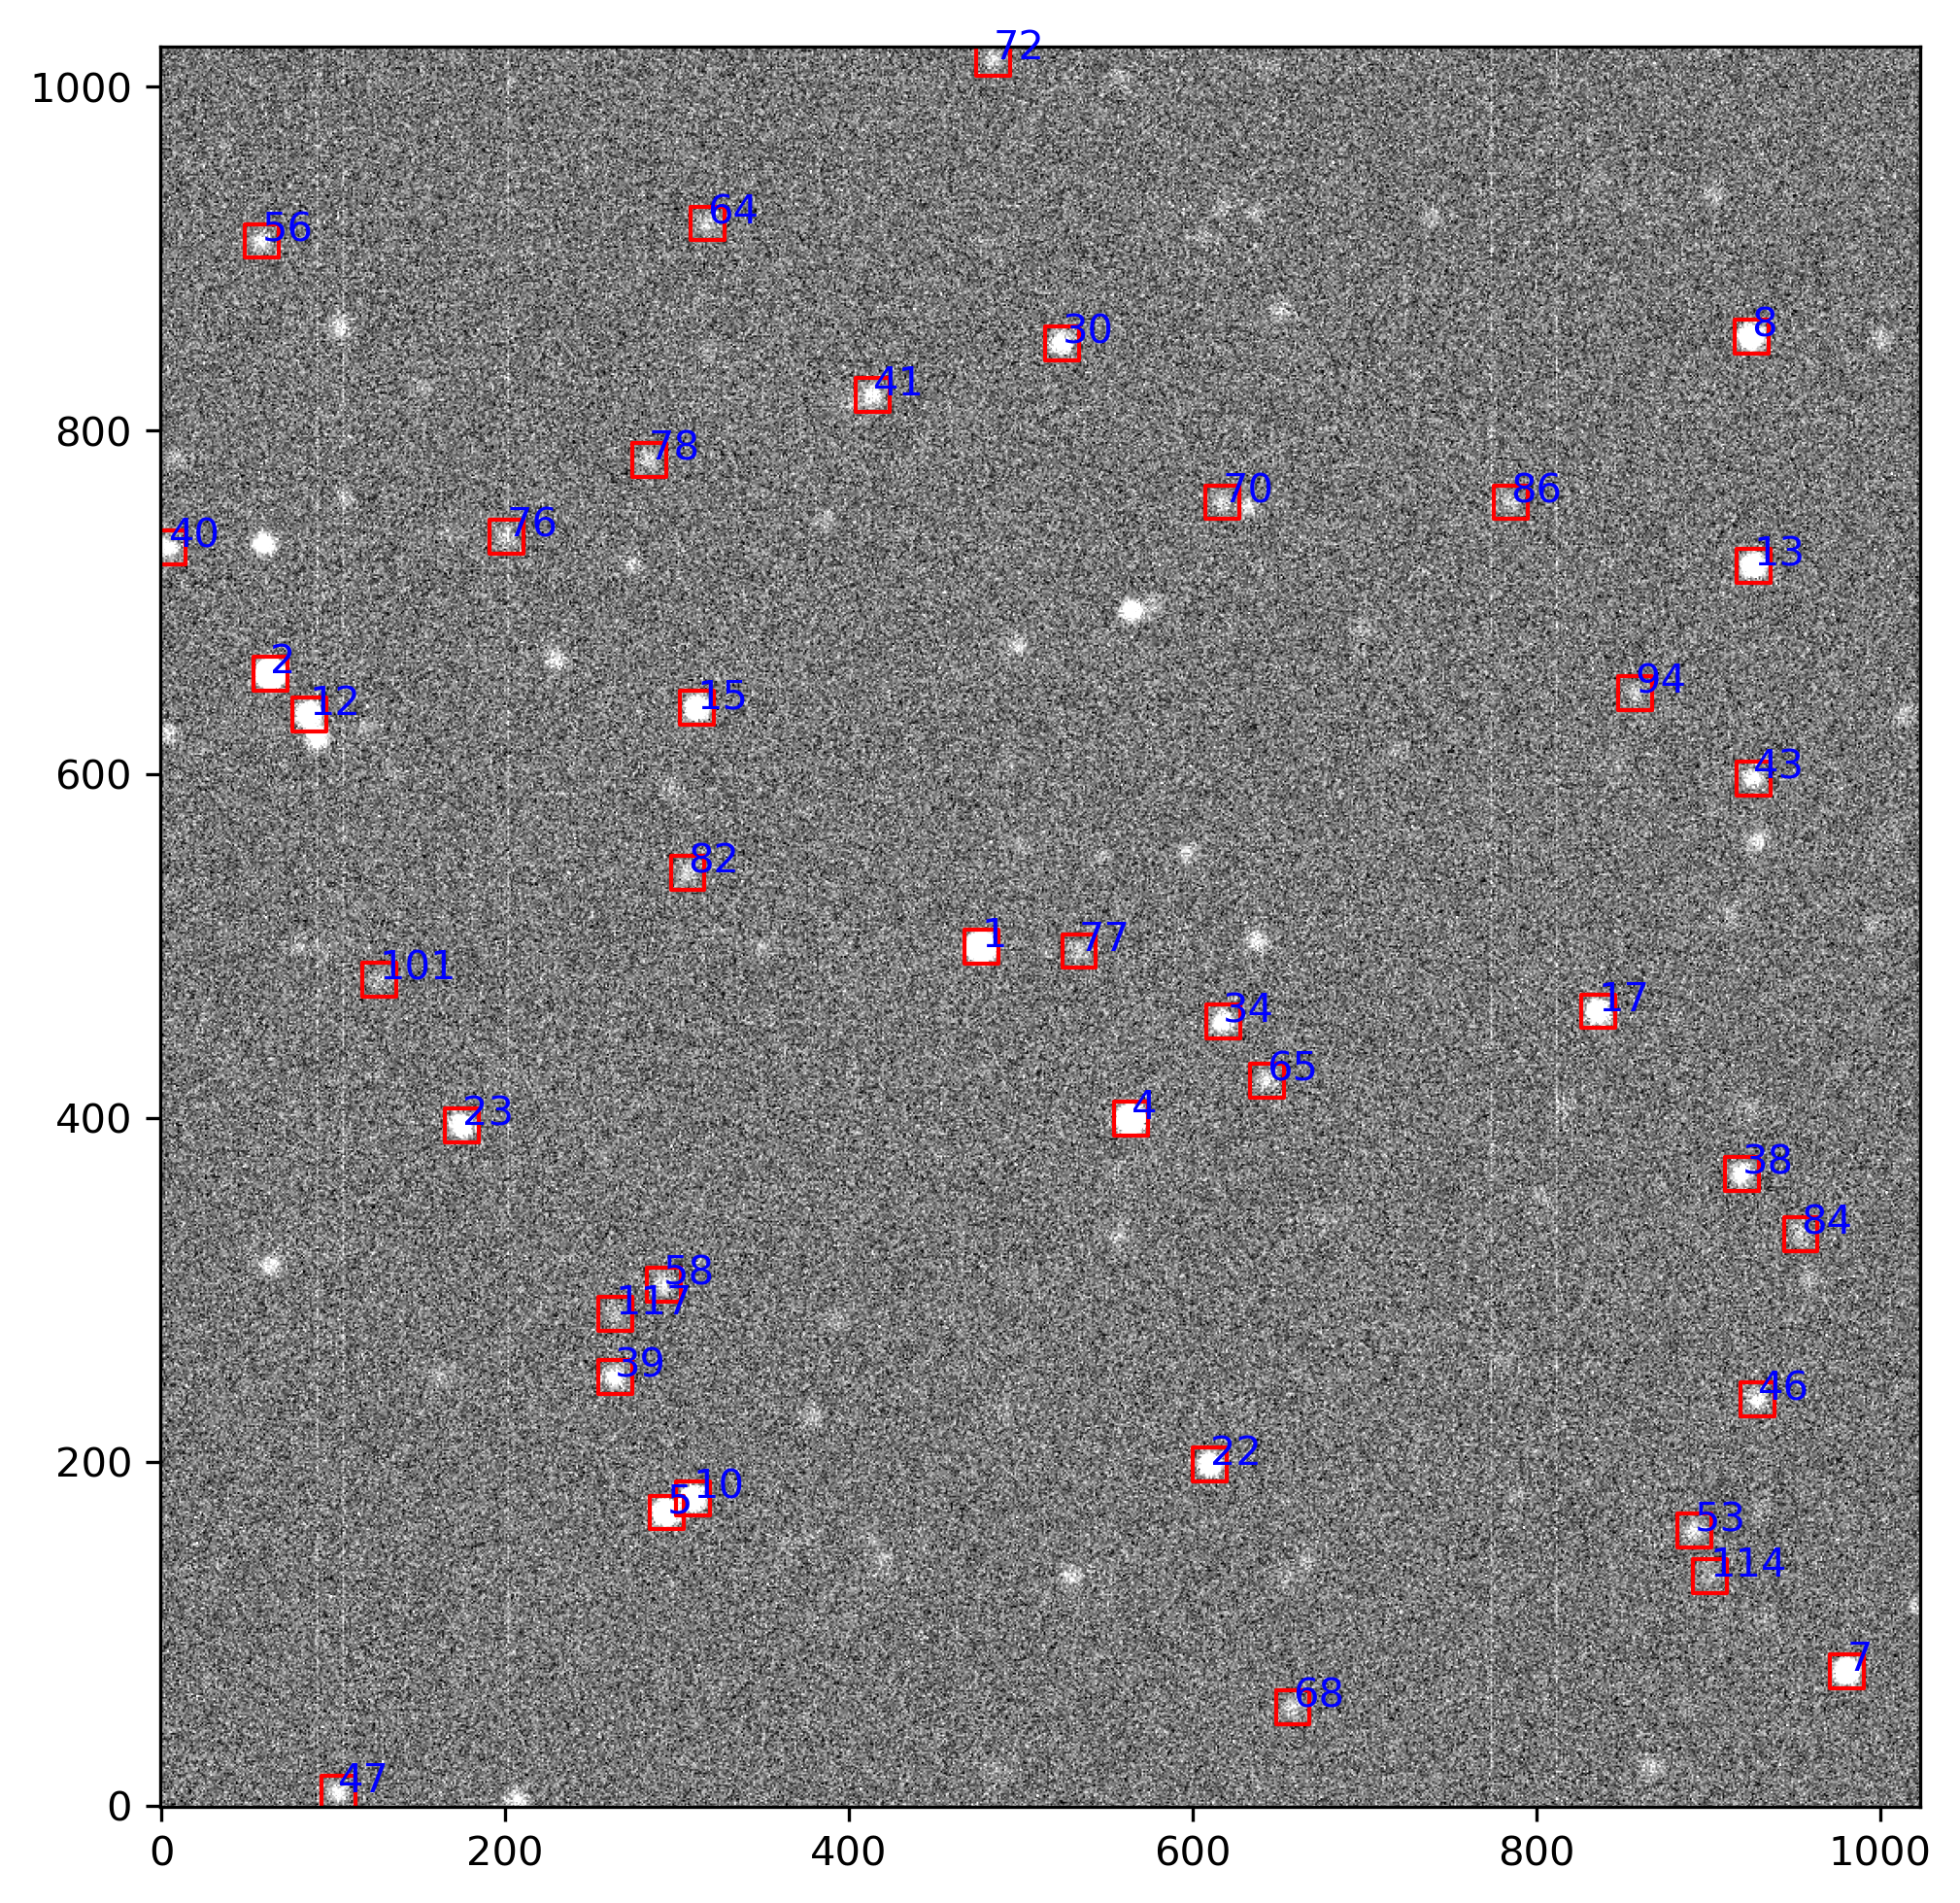

In [19]:
image_raw = sources.image_raw
offset = sources.offset
sources1.show_starmatch(image_raw,offset)

The asterisks on the graph are consistent with the  `catalog_df`.

### Calibrate the orientation of the camera center

In [20]:
sources1.fp_calibrate()
print(sources1.fp_radec_calibrated)
# [[204.01747112  36.25112389]]
# Calibration from Astrometry.net is (13h 36m 04.207s,+36° 15' 03.012")

[[204.01738012  36.25118506]]


### Astronomical Positioning and Apparent Magnitude Estimation
Estimate the celestial coordinates and magnitudes of unknown targets.

In [21]:
xy_target,flux_target = [345,678],1e3 # [[345,678],[-278,521]],[1e3,2e4]
radec,M_affine,M_uncalibrated = sources1.apply(xy_target,flux_target)
print(radec,M_affine,M_uncalibrated)
print(sources1.affine_results.mag_rms,sources1.match_results.mag_rms)

[[199.83995525  31.44951982]] 8.036101294387004 8.011023843192229
0.08052914228287848 0.10371476611720697


# 4. Star Map Matching with geometric distortion considered

## Add distortion to raw sources
Here, we add a Standard Radial distortion to raw sources to obtain distorted sources.

In [22]:
from starmatch.classes import Distortion
distortion = Distortion('RadialStandard',[1e-3,-1e-3],[0.1,0.1],256)
xy_distorted = distortion.apply(sources.xy,pixel_scale=1)

## Load the distorted sources to StarMatch

Theoretically, for distorted images, a corresponding distortion correction model is usually provided. However, when the distortion model is unknown, we use the non-parametric Gaussian Process Regression(GPR) method to fit the distortion and obtain a non-parametric distortion model.

In [23]:
# The following `distortion_correction_model` is the inverse of `distortion`, and the inverse transformation of the distortion model is not yet implemented.
# sources2 = StarMatch.from_sources(xy_distorted,flux,camera_params,20,distortion_correction_model)
sources2 = StarMatch.from_sources(xy_distorted,flux,camera_params,20)

## Star Map Matching

In [24]:
sources2.align(fp_radec,hygv3_simplified,L=32,calibrate=True) 

Instance of class Sources

We get object `sources2` updated with new attributes added:
```  
- _mx_L -> Normalized GPR model for distortion on x component
- _my_L -> Normalized GPR model for distortion on y component  
- calibrated_results -> Instance of class Constructor, whose attributes include 
    xy -> Affined pixel coordinates for distortion-corrected sources
    xy_res -> Residuals of xy
    xy_rms -> RMS of xy
    mag_res -> Same to that of match_results
    mag_rms -> Same to that of match_results
    C -> Same to that of match_results
    C_sigma -> Same to that of match_results
    catalog_df -> Pandas dataframe of matched stars for distortion-corrected sources
    _description -> results description
    pixels_camera_match -> Pixel coordinates of distortion-corrected sources
    radec_res -> Residuals of celestial coordinates for distortion-corrected sources
    radec_rms -> RMS of celestial coordinates for distortion-corrected sources
```

## Distortion Map

Show the distortion of the camera in modes of vector or contourf.

### Vector plot

The vector plot shows the distortion where the sources are located.

<Figure size 432x288 with 0 Axes>

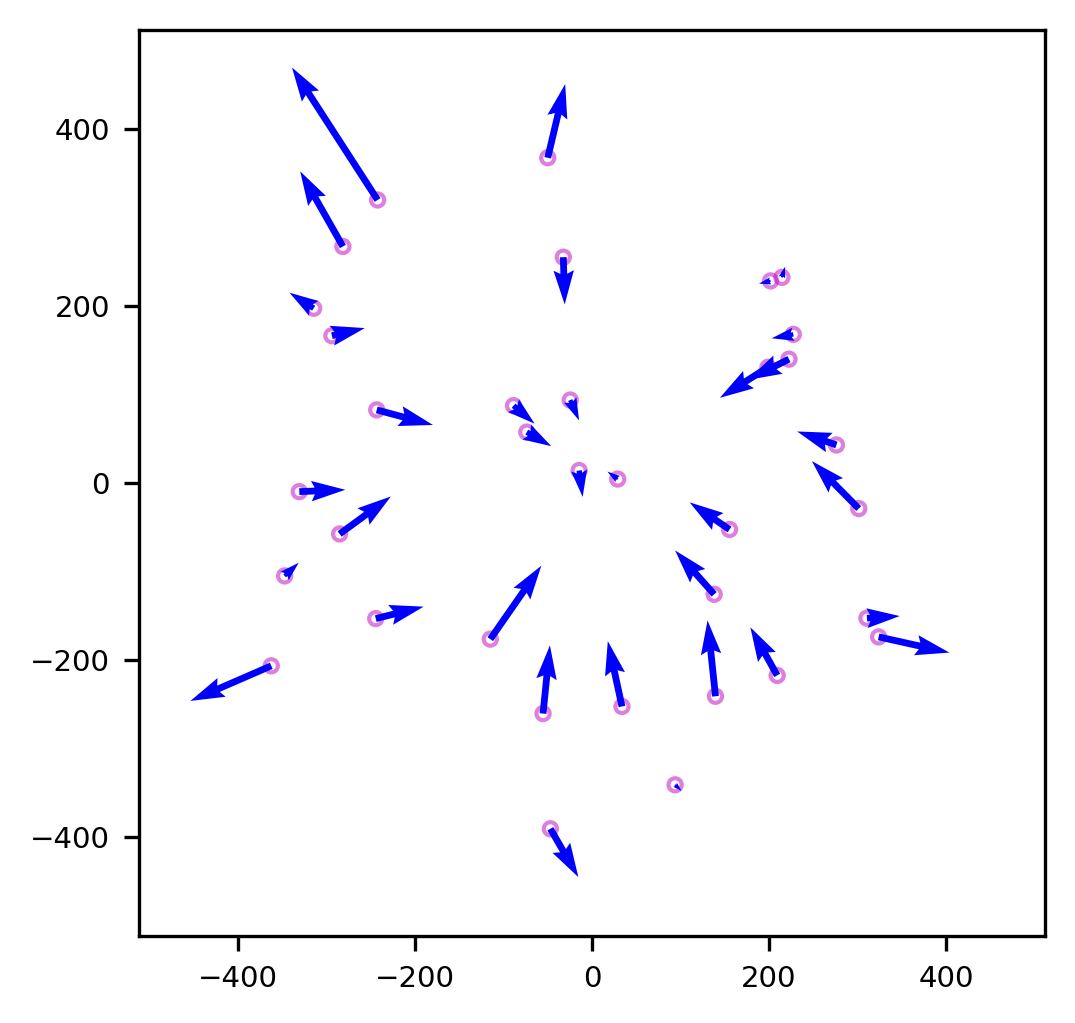

In [25]:
sources2.show_distortion('vector')

### Contour plot

The following contour plot shows the distortion in the x and y directions, respectively.

<Figure size 432x288 with 0 Axes>

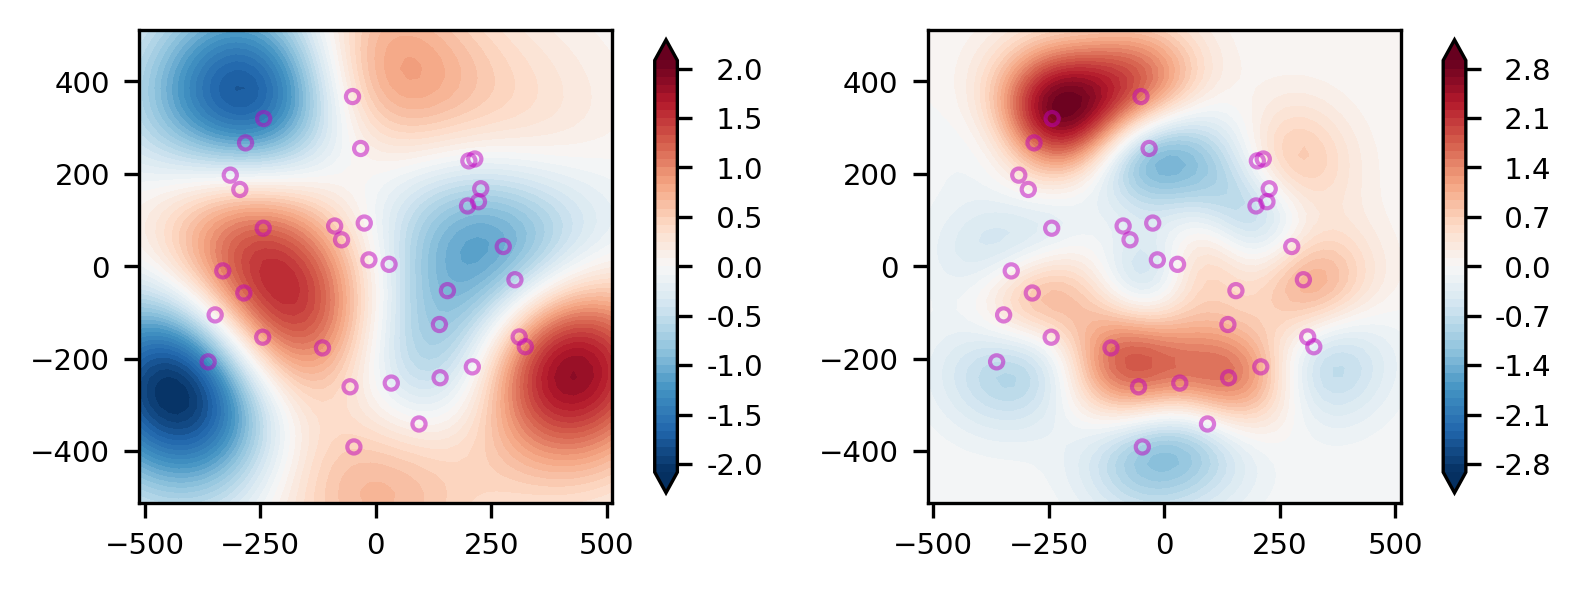

In [26]:
sources2.show_distortion('contourf')